In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
%run woe_script.py

In [3]:
%matplotlib inline
#%pylab inline

In [93]:
train_x = pd.read_csv("mail_online_game/x_train.csv", sep=";")
test_x = pd.read_csv("mail_online_game/x_test.csv", sep=";")
train_y = pd.read_csv("mail_online_game/y_train.csv", header=None)

In [5]:
import logging
import numpy as np
import sklearn as ske
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegressionCV, Lo
from sklearn.metrics import mean_absolute_error, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

from heamy.dataset import Dataset
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline

In [6]:
train_x.describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,2.528900e+04,25289.000000,25289.000000,25289.000000
mean,18.424888,12.415991,3.507612,26.841393,13.330451,0.152438,4.901222,0.534841,2.884268e+06,2138.215232,26.884495,2.725058
std,20.172964,12.991894,6.766648,39.993029,6.657224,0.359452,6.630469,0.402091,3.415374e+06,2169.987109,29.403565,2.765350
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,4.000000,3.000000,1.000000,4.000000,8.400000,0.000000,0.000000,0.000000,4.830000e+05,575.000000,6.000000,1.000000
50%,11.000000,8.000000,1.000000,12.000000,14.555556,0.000000,2.000000,0.619048,1.700000e+06,1500.000000,18.000000,1.000000
75%,27.000000,16.000000,3.000000,31.000000,17.720000,0.000000,6.000000,1.000000,3.890000e+06,2875.000000,37.000000,3.000000
max,146.000000,142.000000,186.000000,563.000000,40.000000,1.000000,81.000000,1.000000,3.133800e+07,24275.000000,319.000000,14.000000


In [94]:
df = pd.concat([train_x, test_x])

In [8]:
df.shape

(50578, 12)

In [9]:
df.tail()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
25284,5,6,3,8,9.000000,0,1,1.000000,960000,1050,13,2
25285,5,6,1,7,8.500000,1,0,0.000000,1394000,1250,15,3
25286,5,6,1,6,11.166667,0,1,1.000000,1024000,1125,12,1
25287,12,13,1,16,14.384615,0,7,0.857143,3658000,2525,31,3
25288,0,1,1,1,3.000000,0,0,0.000000,125000,250,0,1


In [10]:
df.describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
count,50578.000000,50578.000000,50578.000000,50578.000000,50578.000000,50578.000000,50578.000000,50578.000000,5.057800e+04,50578.000000,50578.000000,50578.000000
mean,18.363004,12.413876,3.441971,26.714322,13.340885,0.151469,4.880758,0.537310,2.883024e+06,2139.044644,26.894065,2.710526
std,20.014975,12.948449,6.643427,39.689900,6.646691,0.358509,6.587505,0.401575,3.395827e+06,2164.908705,29.329371,2.750720
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,4.000000,3.000000,1.000000,4.000000,8.500000,0.000000,0.000000,0.000000,5.020000e+05,625.000000,6.000000,1.000000
50%,11.000000,8.000000,1.000000,12.000000,14.541958,0.000000,2.000000,0.625000,1.718000e+06,1500.000000,18.000000,1.000000
75%,27.000000,16.000000,3.000000,31.000000,17.714286,0.000000,6.000000,1.000000,3.894000e+06,2875.000000,37.000000,3.000000
max,146.000000,145.000000,365.000000,563.000000,48.000000,1.000000,86.000000,1.000000,3.476700e+07,26125.000000,344.000000,14.000000


In [11]:
print df.duplicated().value_counts()
print train_x.duplicated().value_counts()

False    42814
True      7764
dtype: int64
False    21694
True      3595
dtype: int64


In [298]:
train_x.corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864


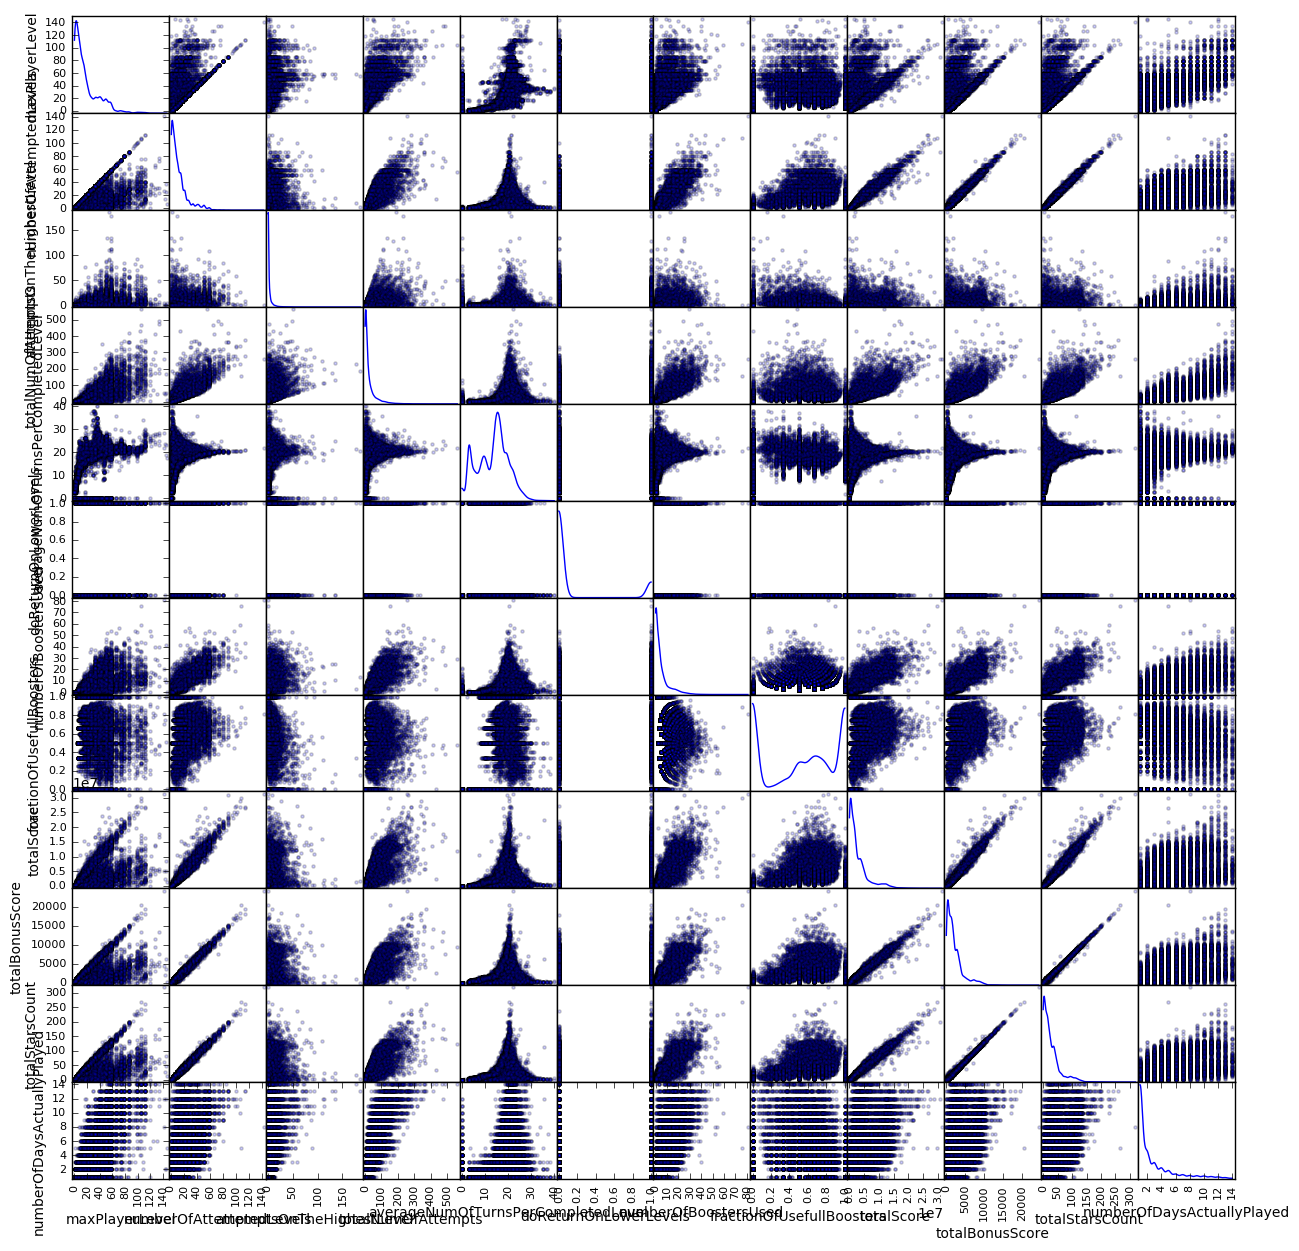

In [59]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train_x, alpha=0.05, figsize=(25, 25), diagonal='kde');

In [12]:
np_arr = test_x['totalBonusScore']
#np_arr = np_arr[np_arr != 0]
np_log = np.sqrt(np_arr)
np_log = np.sqrt(np_log)

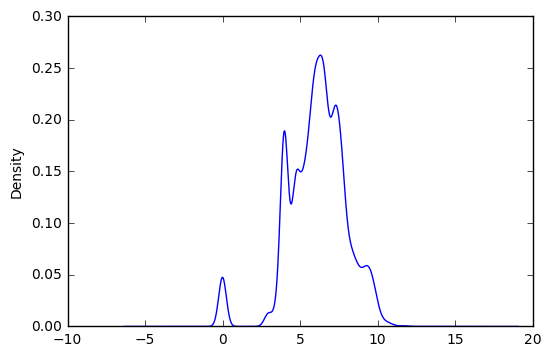

In [13]:
np_log.plot(kind='kde')

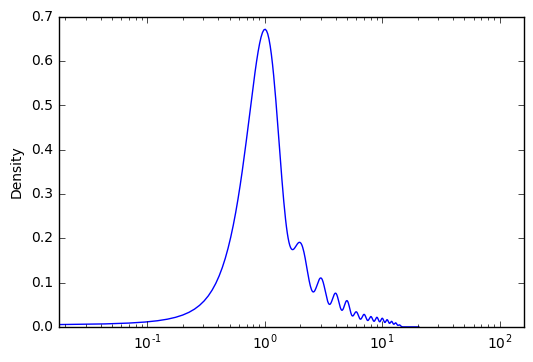

In [15]:
np_arr=df['numberOfDaysActuallyPlayed']
np_arr.plot(kind='kde', xlim = [0,160],logx='true')

# Создадим категориальные признаки с помощью WoE (Weight of Evidence)

In [256]:
woe = WOE()

In [257]:
df.columns

Index([u'maxPlayerLevel', u'numberOfAttemptedLevels',
       u'attemptsOnTheHighestLevel', u'totalNumOfAttempts',
       u'averageNumOfTurnsPerCompletedLevel', u'doReturnOnLowerLevels',
       u'numberOfBoostersUsed', u'fractionOfUsefullBoosters', u'totalScore',
       u'totalBonusScore', u'totalStarsCount', u'numberOfDaysActuallyPlayed',
       u'cluster15_0', u'cluster15_1', u'cluster15_2', u'cluster15_3',
       u'cluster15_4', u'cluster15_5', u'cluster15_6', u'cluster15_7',
       u'cluster15_8', u'cluster15_9', u'cluster15_10', u'cluster15_11',
       u'cluster15_12', u'cluster15_13', u'cluster15_14', u'cluster7_0',
       u'cluster7_1', u'cluster7_2', u'cluster7_3', u'cluster7_4',
       u'cluster7_5', u'cluster7_6', u'cluster3_0', u'cluster3_1',
       u'cluster3_2', u'starsCount_dev_by_bounsScore',
       u'Maxlvl_substract_Attmptdlvl', u'Score_dev_BonusScore',
       u'numOfLvls_dev_numOfDays'],
      dtype='object')

In [258]:
cat_maxPlayerLevel                     = train_x['maxPlayerLevel']
cat_numberOfAttemptedLevels            = train_x['numberOfAttemptedLevels']
cat_attemptsOnTheHighestLevel          = train_x['attemptsOnTheHighestLevel']
cat_totalNumOfAttempts                 = train_x['totalNumOfAttempts']
cat_averageNumOfTurnsPerCompletedLevel = train_x['averageNumOfTurnsPerCompletedLevel']
cat_numberOfBoostersUsed               = train_x['numberOfBoostersUsed']
cat_fractionOfUsefullBoosters          = train_x['fractionOfUsefullBoosters']
cat_totalScore                         = train_x['totalScore']
cat_totalBonusScore                    = train_x['totalBonusScore']
cat_totalStarsCount                    = train_x['totalStarsCount']
cat_numberOfDaysActuallyPlayed         = train_x['numberOfDaysActuallyPlayed']

In [259]:
cat_data = np.stack((cat_maxPlayerLevel, cat_numberOfAttemptedLevels, cat_attemptsOnTheHighestLevel, 
                     cat_totalNumOfAttempts, cat_averageNumOfTurnsPerCompletedLevel, cat_numberOfBoostersUsed,
                     cat_fractionOfUsefullBoosters, cat_totalScore, cat_totalBonusScore, cat_totalStarsCount,
                     cat_numberOfDaysActuallyPlayed))


In [260]:
cat_data = cat_data.transpose()
cat_data_df = pd.DataFrame(data=cat_data)


In [261]:
cat_data_df

,0,1,2,3,4,5,6,7,8,9,10
0,39.0,10.0,3.0,17.0,24.444444,5.0,0.400000,2650000.0,1375.0,21.0,2.0
1,21.0,22.0,19.0,55.0,17.045455,6.0,0.333333,5614000.0,3825.0,51.0,4.0
2,5.0,6.0,1.0,6.0,8.400000,1.0,1.000000,857000.0,1150.0,14.0,1.0
3,21.0,2.0,5.0,6.0,19.000000,1.0,0.000000,120000.0,0.0,1.0,1.0
4,4.0,5.0,1.0,5.0,9.600000,1.0,1.000000,857000.0,1075.0,12.0,1.0
5,0.0,1.0,1.0,1.0,3.000000,0.0,0.000000,113000.0,250.0,0.0,1.0
6,13.0,14.0,2.0,19.0,15.500000,5.0,0.800000,3831000.0,2875.0,34.0,2.0
7,13.0,14.0,5.0,26.0,14.769231,4.0,0.500000,3458000.0,2375.0,31.0,2.0
8,2.0,3.0,1.0,3.0,7.666667,0.0,0.000000,420000.0,750.0,6.0,1.0
9,1.0,2.0,3.0,5.0,3.000000,0.0,0.000000,113000.0,250.0,3.0,1.0


In [262]:
cat_data = woe.feature_discretion(cat_data)
woe_vals = woe.woe(cat_data, train_y.get_values())

In [263]:
woe_vals = woe_vals[0]
cat_data = woe.woe_replace(cat_data, woe_vals)

In [265]:
cat_data_df = pd.DataFrame(data=cat_data)

In [266]:
cat_0 = pd.cut(cat_data_df[0] , 5, labels=[1, 2, 3, 4, 5])
cat_1 = pd.cut(cat_data_df[1] , 5, labels=[1, 2, 3, 4, 5])
cat_2 = pd.cut(cat_data_df[2] , 5, labels=[1, 2, 3, 4, 5])
cat_3 = pd.cut(cat_data_df[3] , 5, labels=[1, 2, 3, 4, 5])
cat_4 = pd.cut(cat_data_df[4] , 5, labels=[1, 2, 3, 4, 5])
cat_5 = pd.cut(cat_data_df[5] , 5, labels=[1, 2, 3, 4, 5])
cat_6 = pd.cut(cat_data_df[6] , 5, labels=[1, 2, 3, 4, 5])
cat_7 = pd.cut(cat_data_df[7] , 5, labels=[1, 2, 3, 4, 5])
cat_8 = pd.cut(cat_data_df[8] , 5, labels=[1, 2, 3, 4, 5])
cat_9 = pd.cut(cat_data_df[9] , 5, labels=[1, 2, 3, 4, 5])
cat_10 = pd.cut(cat_data_df[10] , 5, labels=[1, 2, 3, 4, 5])

In [267]:
cat_data_df = pd.concat([cat_0, cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7, cat_8, cat_9, cat_10], axis=1)

In [268]:
cat_data_df

,0,1,2,3,4,5,6,7,8,9,10
0,1,3,4,1,1,4,2,1,2,3,4
1,1,1,2,1,1,1,1,1,1,1,4
2,2,4,1,2,1,5,1,1,3,5,4
3,1,5,2,2,1,5,2,5,2,3,4
4,3,3,1,3,1,5,1,1,3,5,4
5,3,3,1,4,1,5,2,5,2,3,4
6,1,1,2,1,1,4,2,1,1,2,4
7,1,1,2,1,5,3,1,1,1,2,4
8,3,5,1,5,1,5,2,3,2,5,4
9,3,5,4,3,1,5,2,5,2,4,4


In [269]:
train_x_cat = pd.concat([cat_data_df, train_x], axis=1)

# Пробуем кластеризацию

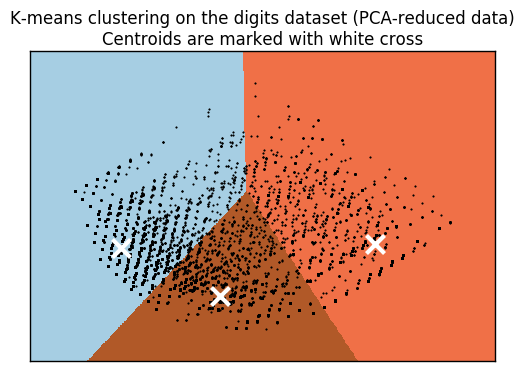

In [243]:
from sklearn.decomposition import PCA
import pylab as pl

import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

data_scale = scale(df)
cat_data_scale = scale(cat_data_df)


reduced_data = PCA(n_components=2).fit_transform(cat_data_scale)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [244]:
print kmeans.cluster_centers_

kmeans.labels_

[[-2.03349752  0.33037504]
 [ 3.65444206  0.44963825]
 [ 0.2008593  -1.16413546]]


array([2, 1, 0, ..., 2, 0, 1])

In [245]:
df.columns

Index([u'maxPlayerLevel', u'numberOfAttemptedLevels',
       u'attemptsOnTheHighestLevel', u'totalNumOfAttempts',
       u'averageNumOfTurnsPerCompletedLevel', u'doReturnOnLowerLevels',
       u'numberOfBoostersUsed', u'fractionOfUsefullBoosters', u'totalScore',
       u'totalBonusScore', u'totalStarsCount', u'numberOfDaysActuallyPlayed'],
      dtype='object')

In [246]:
from sklearn.cluster import KMeans
k15 = KMeans(n_clusters=15, precompute_distances = True, n_jobs=-1)
k15.fit(data_scale)
k7 = KMeans(n_clusters=7, precompute_distances = True, n_jobs=-1)
k7.fit(data_scale)
k3 = KMeans(n_clusters=3, precompute_distances = True, n_jobs=-1)
k3.fit(data_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances=True,
    random_state=None, tol=0.0001, verbose=0)

In [247]:
if data_scale.shape[0] > train_x.shape[0]:
    train_x_scale = data_scale[:len(train_x)]
    test_x_scale = data_scale[len(test_x):]

In [248]:
clusters_test = pd.DataFrame(data=[k15.predict(test_x_scale),k7.predict(test_x_scale), 
        k3.predict(test_x_scale)]).transpose()

clusters_test.rename(columns={0: 'cluster15', 1: 'cluster7', 2: 'cluster3'}, inplace=True)
clusters_test = pd.get_dummies(clusters_test, prefix=['cluster15', 'cluster7', 'cluster3'], 
                                             columns=['cluster15', 'cluster7', 'cluster3'])


clusters_train = pd.DataFrame(data=[k15.predict(train_x_scale), k7.predict(train_x_scale), 
        k3.predict(train_x_scale)]).transpose()

clusters_train.rename(columns={0: 'cluster15', 1: 'cluster7', 2: 'cluster3'}, inplace=True)
clusters_train = pd.get_dummies(clusters_train, prefix=['cluster15', 'cluster7', 'cluster3'], 
                                               columns=['cluster15', 'cluster7', 'cluster3'])

In [249]:
df_temp = pd.concat([clusters_train, clusters_test])
df = pd.concat([df, df_temp], axis=1)

In [250]:
df

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,...,cluster7_0,cluster7_1,cluster7_2,cluster7_3,cluster7_4,cluster7_5,cluster7_6,cluster3_0,cluster3_1,cluster3_2
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,...,0,0,0,0,0,0,1,0,1,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,...,0,0,0,0,0,0,1,0,1,0
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,...,0,0,0,1,0,0,0,0,1,0
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,...,0,0,0,0,0,1,0,0,0,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,...,0,0,0,1,0,0,0,0,1,0
5,0,1,1,1,3.000000,0,0,0.000000,113000,250,...,1,0,0,0,0,0,0,0,0,1
6,13,14,2,19,15.500000,0,5,0.800000,3831000,2875,...,0,0,0,1,0,0,0,0,1,0
7,13,14,5,26,14.769231,0,4,0.500000,3458000,2375,...,0,0,0,1,0,0,0,0,1,0
8,2,3,1,3,7.666667,0,0,0.000000,420000,750,...,1,0,0,0,0,0,0,0,0,1
9,1,2,3,5,3.000000,1,0,0.000000,113000,250,...,1,0,0,0,0,0,0,0,0,1


# Добавим новые фичи
Идеи:
1. totalStarsCount / (totalBonusScore + 1)
2. MaxLevel - AttmptedLevel
3. TotalScore / TotalBonusScore
4. NumberOfLevels / NumberOfDays

In [251]:
df['starsCount_dev_by_bounsScore'] = df['totalStarsCount'] / (df['totalBonusScore'] + 1)
df['Maxlvl_substract_Attmptdlvl'] = df['maxPlayerLevel'] - df['numberOfAttemptedLevels']
df['Score_dev_BonusScore'] = df['totalScore'] / df['totalBonusScore']
df['numOfLvls_dev_numOfDays'] = df['numberOfAttemptedLevels'] / df['numberOfDaysActuallyPlayed']
df['booster_dev_usefulBosters'] = df['numberOfBoostersUsed'] - df['fractionOfUsefullBoosters']
df['player_lvl_cat'] = pd.cut(df['maxPlayerLevel'] , 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Model with raw data

In [276]:
dataset = Dataset(train_x.as_matrix(), train_y.values, test_x.as_matrix())

In [9]:
xgbparams1 = {"learning_rate": 0.01, "max_depth": 6, "n_estimators": 500, "subsample": 0.8}
xgbparams2 = {"learning_rate": 0.005, "max_depth": 8, "n_estimators": 1500, "subsample": 0.9}

In [10]:
etparams = {"n_estimators": 50, "n_jobs": -1}

In [11]:
rfparams = {"n_estimators": 100, "n_jobs": -1}

In [12]:
xgbclf1 = Classifier(dataset=dataset, estimator=XGBClassifier, parameters=xgbparams1)
xgbclf2 = Classifier(dataset=dataset, estimator=XGBClassifier, parameters=xgbparams2)
etclf = Classifier(dataset=dataset, estimator=ExtraTreesClassifier, parameters=etparams)
rfclf = Classifier(dataset=dataset, estimator=ExtraTreesClassifier, parameters=rfparams)

In [14]:
pipeline = ModelsPipeline(etclf, rfclf, xgbclf1)

In [15]:
stack_ds = pipeline.stack(k=5, seed=111)

C:\Users\tima0\Anaconda2\lib\site-packages\heamy\estimator.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)
C:\Users\tima0\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tima0\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# 2nd level
stack_rf = Classifier(dataset=stack_ds, estimator=RandomForestClassifier, parameters={'n_estimators': 100},name='rf')
stack_lr = Classifier(dataset=stack_ds, estimator=LogisticRegressionCV, name='lr')
stack_et = Classifier(dataset=stack_ds, estimator=ExtraTreesClassifier, name='et')
stack_pipeline = ModelsPipeline(stack_rf,stack_lr, stack_et)

# 3rd level
weights = stack_pipeline.find_weights(log_loss)
print('---')
result = stack_pipeline.weight(weights)

Best Score (log_loss): 0.38178779742
Best Weights: [  9.64940602e-02   9.03505940e-01   6.50521303e-19]
---


In [38]:
subm = result.execute()

In [39]:
subm

array([ 0.14048503,  0.05426109,  0.58401004, ...,  0.06353407,
        0.1602696 ,  0.05831808])

In [40]:
test_df = pd.DataFrame()
test_df["pred"] = subm
test_df.to_csv("sumb_mail1.csv", index=None, header=None)

# Model 3

In [47]:
if df.shape[0] > train_x.shape[0]:
    train_x = df[:len(train_x)]
    test_x = df[len(train_x):]

In [49]:
gbm = xgb.XGBClassifier(
    base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)\
.fit(train_x, train_y)

C:\Users\tima0\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tima0\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


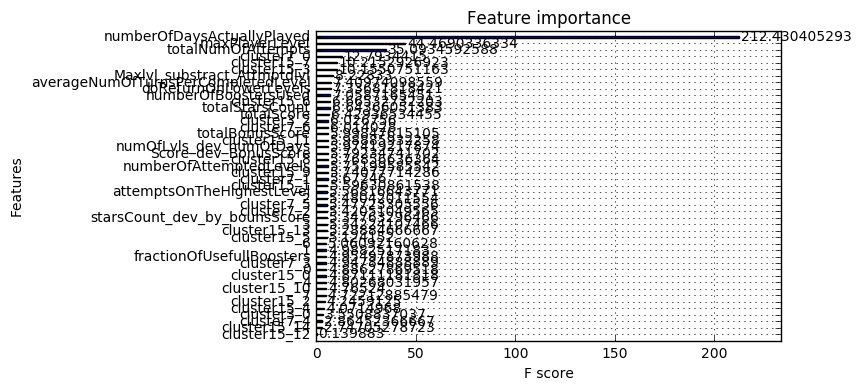

In [84]:
xgb.plot_importance(gbm, importance_type='gain')


In [85]:
xgb_matrix = xgb.DMatrix(train_x, train_y)
xgb_param = gbm.get_xgb_params()
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=xgb_param['n_estimators'],
    nfold=5,
    verbose_eval=50,
    early_stopping_rounds=50,
    metrics='logloss'
)

[0]	train-logloss:0.688001+1.73597e-05	test-logloss:0.688052+2.93435e-05
[20]	train-logloss:0.603003+0.000307767	test-logloss:0.604239+0.000578271
[40]	train-logloss:0.54321+0.000489621	test-logloss:0.545622+0.00107921
[60]	train-logloss:0.499915+0.000637702	test-logloss:0.503437+0.00147127
[80]	train-logloss:0.467957+0.000753147	test-logloss:0.472526+0.00179937
[100]	train-logloss:0.443996+0.000834748	test-logloss:0.449683+0.00211082
[120]	train-logloss:0.42583+0.000894587	test-logloss:0.43261+0.00239261
[140]	train-logloss:0.411918+0.000944063	test-logloss:0.419745+0.00267412
[160]	train-logloss:0.401219+0.000972386	test-logloss:0.410064+0.00297335
[180]	train-logloss:0.392925+0.00100246	test-logloss:0.402786+0.00324609
[200]	train-logloss:0.386456+0.00103927	test-logloss:0.397371+0.0034727
[220]	train-logloss:0.381411+0.0010846	test-logloss:0.393335+0.00369469
[240]	train-logloss:0.377346+0.0010836	test-logloss:0.390272+0.00390736
[260]	train-logloss:0.374093+0.00110275	test-logloss

In [126]:
predictions = gbm.predict_proba(test_x)
predictions_filtered = [x[1] for x in predictions]
result_fromSlack_baseline = predictions_filtered

In [128]:
np.savetxt("submission_mail_2.csv", predictions_filtered, delimiter="\n")

# Model 4

In [284]:
if df.shape[0] > train_x.shape[0]:
    train_x = df[:len(train_x)]
    test_x = df[len(train_x):]

In [285]:
gbm = xgb.XGBClassifier(
    base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)\
.fit(train_x, train_y)

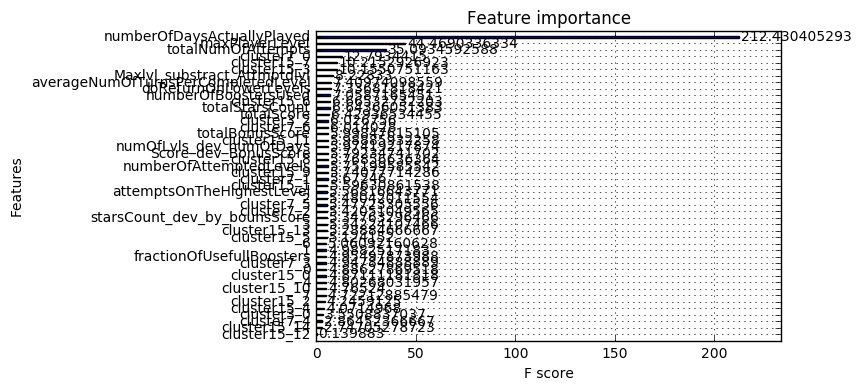

In [85]:
xgb.plot_importance(gbm, importance_type='gain')

In [287]:
xgb_matrix = xgb.DMatrix(train_x, train_y)
xgb_param = gbm.get_xgb_params()
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=xgb_param['n_estimators'],
    nfold=5,
    verbose_eval=50,
    early_stopping_rounds=50,
    metrics='logloss'
)

[0]	train-logloss:0.688002+1.66541e-05	test-logloss:0.688054+3.11037e-05
[50]	train-logloss:0.519996+0.000560144	test-logloss:0.522741+0.00124154
[100]	train-logloss:0.44424+0.000779204	test-logloss:0.44953+0.002037
[150]	train-logloss:0.406725+0.000927775	test-logloss:0.414405+0.00271734
[200]	train-logloss:0.387256+0.00101736	test-logloss:0.397256+0.0032649
[250]	train-logloss:0.376702+0.0010205	test-logloss:0.388902+0.00365976
[300]	train-logloss:0.370497+0.00108756	test-logloss:0.384964+0.00401628
[350]	train-logloss:0.366504+0.00115362	test-logloss:0.383114+0.00424102
[400]	train-logloss:0.363605+0.00109601	test-logloss:0.382255+0.00437684
[450]	train-logloss:0.361174+0.00111003	test-logloss:0.38181+0.00447748
[500]	train-logloss:0.359052+0.00112118	test-logloss:0.381593+0.00456626
[550]	train-logloss:0.356991+0.00119631	test-logloss:0.38154+0.00461252
[600]	train-logloss:0.355165+0.00120216	test-logloss:0.381538+0.00460157


In [288]:
predictions = gbm.predict_proba(test_x)
predictions_filtered = [x[1] for x in predictions]
result_fromSlack_baseline = predictions_filtered

In [289]:
np.savetxt("submission_mail_model_4.csv", predictions_filtered, delimiter="\n")

# Model 4 feature_selection

In [237]:
if df.shape[0] > train_x.shape[0]:
    train_x = df[:len(train_x)]
    test_x = df[len(train_x):]

In [51]:
bst = gbm.booster()
importance = bst.get_score(importance_type='gain')
importance = sorted(importance.items())
importance = pd.DataFrame(data=importance, columns=['feature', 'score'])
importance = importance.sort(columns='score', ascending=False)

C:\Users\tima0\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [54]:
best_features = importance[:30]
best_feature_names = best_features['feature']
train_x_fs = train_x[best_feature_names]
test_x_fs = test_x[best_feature_names]

In [86]:
xgbparams = {'base_score': 0.5,
 'colsample_bylevel': 0.9500000000000001,
 'colsample_bytree': 0.75,
 'gamma': 6.45,
 'learning_rate': 0.006,
 'max_delta_step': 8.15,
 'max_depth': 5,
 'min_child_weight': 5.0,
 'n_estimators': 2000,
 'nthread': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 1.35,
 'scale_pos_weight': 1.0,
 'silent': 1,
 'subsample': 0.6000000000000001
 'seed': 123}

In [399]:
gbm = xgb.XGBClassifier(
    base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)\
.fit(train_x_fs, train_y)

In [400]:
xgb_matrix = xgb.DMatrix(train_x_fs, train_y)
xgb_param = xgbparams
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=xgb_param['n_estimators'],
    nfold=5,
    verbose_eval=50,
    early_stopping_rounds=50,
    metrics='logloss'
)

[0]	train-logloss:0.688002+1.71394e-05	test-logloss:0.688053+2.9267e-05
[50]	train-logloss:0.519968+0.000547825	test-logloss:0.52266+0.00122975
[100]	train-logloss:0.444266+0.000812845	test-logloss:0.44949+0.00205121
[150]	train-logloss:0.40677+0.00095607	test-logloss:0.414419+0.00272453
[200]	train-logloss:0.387259+0.000999036	test-logloss:0.397194+0.00327689
[250]	train-logloss:0.376699+0.00108261	test-logloss:0.388804+0.00371679
[300]	train-logloss:0.370528+0.00111357	test-logloss:0.384807+0.00411876
[350]	train-logloss:0.366517+0.00117566	test-logloss:0.382906+0.00442991
[400]	train-logloss:0.363626+0.00119237	test-logloss:0.382075+0.00458564
[450]	train-logloss:0.361182+0.0012022	test-logloss:0.381706+0.0046917
[500]	train-logloss:0.35904+0.00115818	test-logloss:0.38153+0.00474601
[550]	train-logloss:0.356996+0.00116513	test-logloss:0.381526+0.00480749


In [401]:
predictions = gbm.predict_proba(test_x_fs)
predictions_filtered = [x[1] for x in predictions]
result_fromSlack_baseline = predictions_filtered

In [402]:
np.savetxt("submission_mail_model_4_fs.csv", predictions_filtered, delimiter="\n")

# hyperopt на model_4 fs

In [55]:
import pprint
import xgboost
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from datetime import datetime
#import teleloggingbot

dfx_train = train_x_fs
dfy_train = train_y
#dfy_train.columns = ['class']

xgb_matrix = xgboost.DMatrix(dfx_train, dfy_train)
best_score = 1e6
best_param = None
counter = 0

def score(params):
  global xgb_matrix, best_score, best_param, counter
  
  num_round = int(params['n_estimators'])
  del params['n_estimators']
  cvresult = xgboost.cv(params, xgb_matrix, num_boost_round=num_round,
                    nfold=5, stratified=True, seed=42, verbose_eval=None,
                    early_stopping_rounds=50, metrics='logloss')
  score = cvresult['test-logloss-mean'].iloc[-1]
  params['n_estimators'] = len(cvresult)
  pprint.pprint(params)
  print("\t", score)
  counter += 1
  if score < best_score:
    best_score = score
    best_param = params 
  return {'loss': score, 'status': STATUS_OK}

def optimize():
  space = {
    'n_estimators' : 3000,
    'learning_rate' : hp.choice('learning_rate', [0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.015, 0.2, 0.25, 0.35, 0.4]),
    'max_depth' : hp.choice('max_depth', np.arange(1, 15, dtype=int)),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 7, 1),
    'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
    'gamma' : hp.quniform('gamma', 0.5, 10, 0.05),
    'reg_lambda' : hp.quniform('reg_lambda', 0.5, 10, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'colsample_bylevel': hp.quniform('colsample_bylevel', 0.5, 1, 0.05),
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 0.05),
    'scale_pos_weight': hp.quniform('scale_pos_weight', 0, 1, 0.05),
    'objective': 'binary:logistic',
    'nthread' : 8,
    'silent' : 1
  }

  print('Start optimizing at ', datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
  try:
    fmin(score, space, algo=tpe.suggest, trials=Trials(), max_evals=1000)
  except KeyboardInterrupt:
    pass
  res_str = '='*30
  res_str += '\nFinish optimizing at ' + str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
  res_str += '\nBest loss: ' + str(best_score)
  res_str += '\n'+pprint.pformat(best_param)
  print(res_str)

if __name__ == '__main__':
  optimize()

('Start optimizing at ', '2017-03-14 00:48:24')
{'colsample_bylevel': 0.55,
 'colsample_bytree': 0.8500000000000001,
 'gamma': 8.450000000000001,
 'learning_rate': 0.001,
 'max_delta_step': 7.300000000000001,
 'max_depth': 11,
 'min_child_weight': 2.0,
 'n_estimators': 1356,
 'nthread': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 3.45,
 'scale_pos_weight': 0.15000000000000002,
 'silent': 1,
 'subsample': 0.55}
('\t', 0.50118859999999998)
{'colsample_bylevel': 0.9500000000000001,
 'colsample_bytree': 0.65,
 'gamma': 9.5,
 'learning_rate': 0.002,
 'max_delta_step': 4.1000000000000005,
 'max_depth': 7,
 'min_child_weight': 4.0,
 'n_estimators': 3000,
 'nthread': 8,
 'objective': 'binary:logistic',
 'reg_lambda': 3.9000000000000004,
 'scale_pos_weight': 0.8500000000000001,
 'silent': 1,
 'subsample': 0.7000000000000001}
('\t', 0.38415660000000001)
{'colsample_bylevel': 0.75,
 'colsample_bytree': 1.0,
 'gamma': 4.45,
 'learning_rate': 0.008,
 'max_delta_step': 4.15,
 'max_depth': 9,


# Model 4 with tunned parameters

In [68]:
if df.shape[0] > train_x.shape[0]:
    train_x = df[:len(train_x)]
    test_x = df[len(train_x):]

In [71]:
bst = gbm.booster()

In [81]:
importance = bst.get_score(importance_type='weight')
importance = sorted(importance.items())
importance = pd.DataFrame(data=importance, columns=['feature', 'score'])
importance = importance.sort(columns='score', ascending=False)

C:\Users\tima0\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [82]:
best_features = importance[:30]
best_feature_names = best_features['feature']

In [83]:
train_x_fs = train_x[best_feature_names]
test_x_fs = test_x[best_feature_names]

In [84]:
gbm = xgb.XGBClassifier(
    base_score=0.5, colsample_bylevel=0.9500000000000001, colsample_bytree=0.75,
       gamma=6.45, learning_rate=0.006, max_delta_step=8.15, max_depth=5,
       min_child_weight=5.0, missing=None, n_estimators=2000, nthread=8,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1.35,
       scale_pos_weight=1, seed=0, silent=1, subsample= 0.6000000000000001)\
.fit(train_x_fs, train_y)

In [85]:
xgb_matrix = xgb.DMatrix(train_x_fs, train_y)
xgb_param = gbm.get_xgb_params()
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=xgb_param['n_estimators'],
    nfold=5,
    verbose_eval=50,
    early_stopping_rounds=50,
    metrics='logloss'
)

[0]	train-logloss:0.690072+1.20996e-05	test-logloss:0.690097+1.79154e-05
[50]	train-logloss:0.573468+0.000521551	test-logloss:0.574783+0.000710274
[100]	train-logloss:0.503193+0.000629087	test-logloss:0.505672+0.0014908
[150]	train-logloss:0.458721+0.000718133	test-logloss:0.462277+0.00207105
[200]	train-logloss:0.429876+0.000818109	test-logloss:0.434397+0.00260205
[250]	train-logloss:0.410823+0.000869963	test-logloss:0.416209+0.00307227
[300]	train-logloss:0.398102+0.00096909	test-logloss:0.404304+0.00348477
[350]	train-logloss:0.389533+0.000941298	test-logloss:0.396493+0.00384381
[400]	train-logloss:0.383758+0.000987136	test-logloss:0.391402+0.00411718
[450]	train-logloss:0.37978+0.00105686	test-logloss:0.388055+0.00432963
[500]	train-logloss:0.377009+0.00107739	test-logloss:0.385936+0.00451902
[550]	train-logloss:0.375058+0.00105358	test-logloss:0.384566+0.00472466
[600]	train-logloss:0.373575+0.00107015	test-logloss:0.383637+0.00487362
[650]	train-logloss:0.372432+0.00110651	test-l

In [86]:
predictions = gbm.predict_proba(test_x_fs)
predictions_filtered = [x[1] for x in predictions]
result_fromSlack_baseline = predictions_filtered

In [87]:
np.savetxt("submission_mail_model_4_fs_tunned_2.csv", predictions_filtered, delimiter="\n")

# усредняем все решения

In [57]:
sol_1 = np.loadtxt("sumb_mail1.csv")
sol_2 = np.loadtxt("submission_mail_2.csv")
sol_3 = np.loadtxt("submission_mail_model_4.csv")
sol_4 = np.loadtxt("submission_mail_model_4_fs.csv")
sol_5 = np.loadtxt("submission_mail_model_4_fs_tunned.csv")
sol_6 = np.loadtxt("submission_mail_model_4_fs_tunned_2.csv")
sol_7 = np.loadtxt("sumb_staking_models_1.csv")

In [58]:
blended_sol = (sol_7 + sol_4 + sol_5)/3

In [59]:
np.savetxt("submission_mail_blended_6_sols.csv", blended_sol, delimiter="\n")